<a href="https://colab.research.google.com/github/MAYDAY161/001/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
test_df = pd.read_csv('/content/test.csv')
train_df = pd.read_csv('/content/train.csv')

In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
cat_feat = ['PassengerId', 'Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked']
train_df.drop
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [ ]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [ ]:
#группировка по возрасту
train_df.groupby(train_df['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


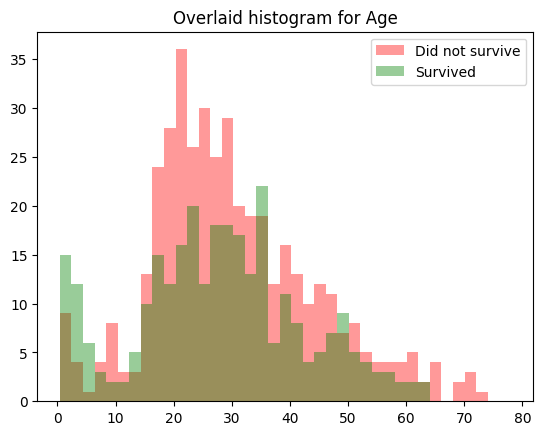

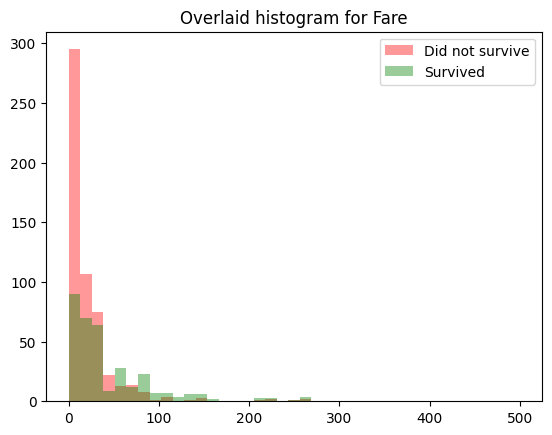

In [ ]:
for i in ['Age', 'Fare']:
  died = list(train_df[train_df['Survived'] == 0][i].dropna())
  survived = list(train_df[train_df['Survived'] == 1][i].dropna())
  xmin = min(min(died), min(survived))
  xmax = max(max(died), max(survived))
  width = (xmax - xmin) / 40
  sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
  sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
  plt.legend(['Did not survive', 'Survived'])
  plt.title('Overlaid histogram for {}'.format(i))
  plt.show()

<Figure size 640x480 with 0 Axes>

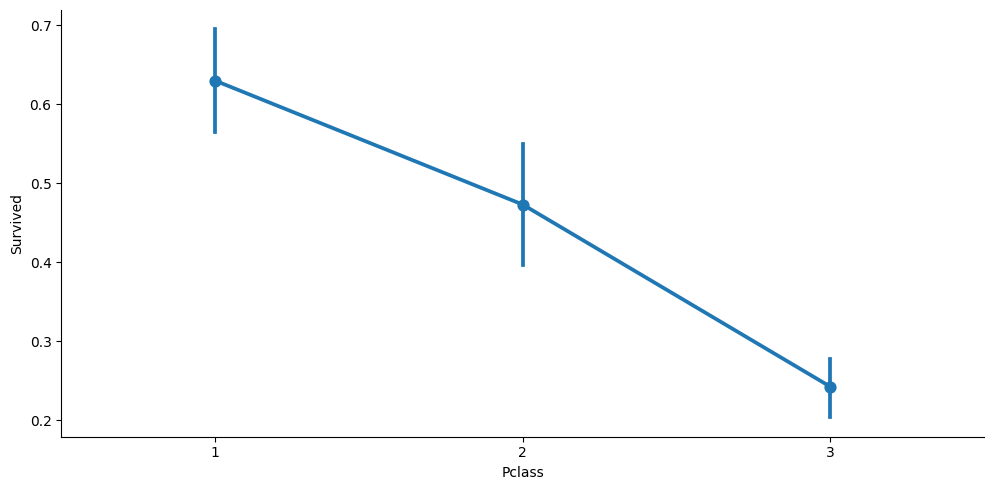

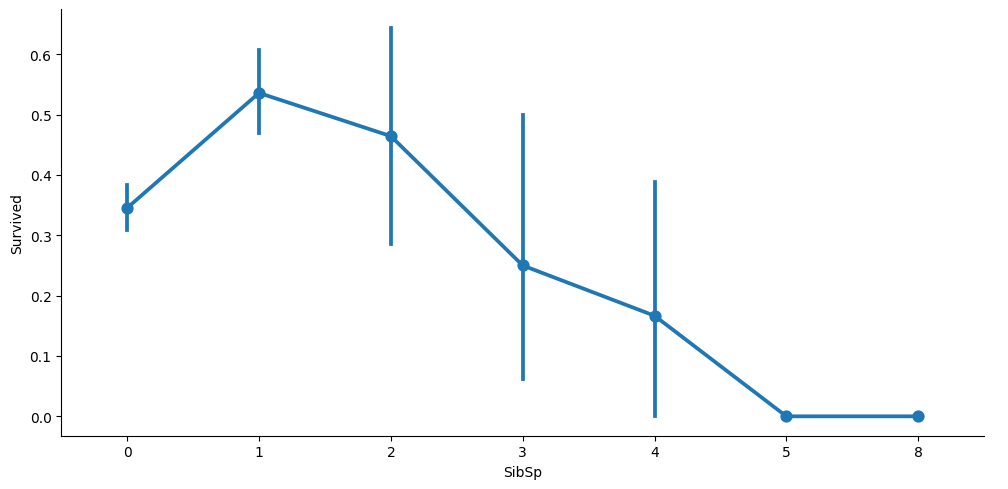

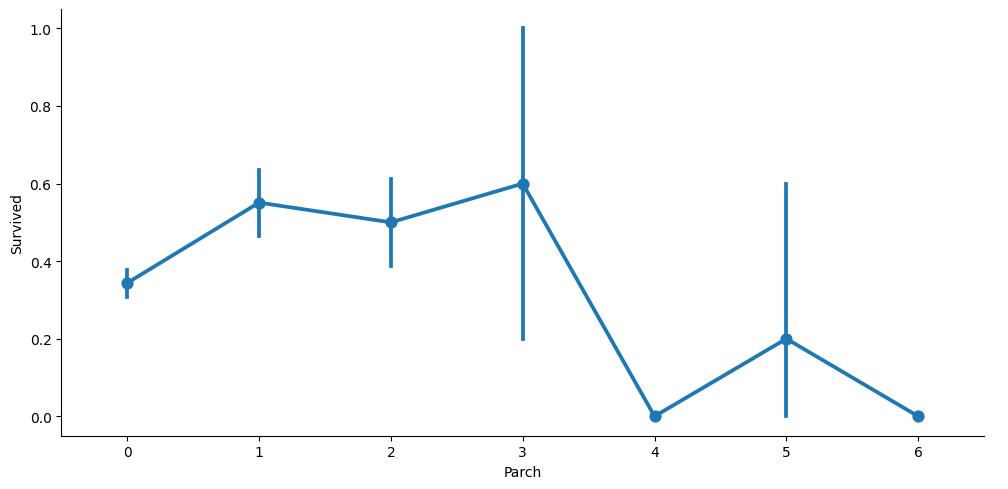

In [ ]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=train_df, kind='point', aspect=2,)

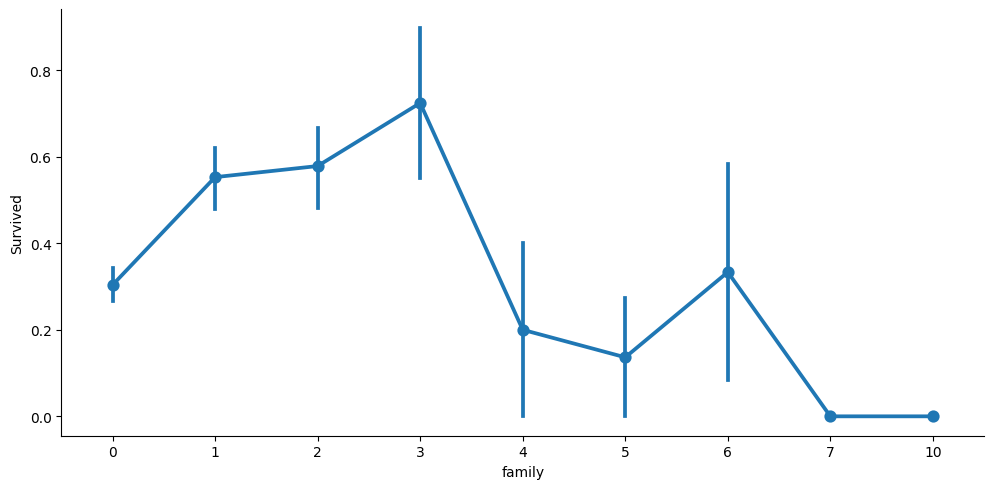

In [ ]:
train_df['family'] = train_df['SibSp'] + train_df['Parch']
sns.catplot(x='family', y='Survived', data=train_df, kind='point', aspect=2,)

In [ ]:
train_df.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
family        0
dtype: int64

In [ ]:
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)
train_df.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
family      0
dtype: int64

In [ ]:
train_df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,family
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,1
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,1
4,0,3,35.000000,0,0,8.0500,0
5,0,3,29.699118,0,0,8.4583,0
6,0,1,54.000000,0,0,51.8625,0
7,0,3,2.000000,3,1,21.0750,4
8,1,3,27.000000,0,2,11.1333,2
9,1,2,14.000000,1,0,30.0708,1


In [ ]:
train_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

In [ ]:
train_df.head()

,Survived,Pclass,Age,Fare,family
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0
